# PAIML HW 3

Implementing Neural Network class

In [11]:
import numpy as np
import pandas as pd
from sklearn.metrics import log_loss, accuracy_score, f1_score

def sigmoid(z):
  # Numerically stable sigmoid function
  return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))

def relu(z, alpha = 0.01):
  return np.where(z > 0, z, alpha*z)

def d_sigmoid(z):
  s = sigmoid(z)
  return s * (1 - s)

def d_relu(z, alpha = 0.01):
  return np.where(z > 0, 1.0, alpha)

class NeuralNetwork():
  def __init__(self, n_features, n_hidden, n_output, activation = sigmoid, debug=False):
    self.n_features = n_features
    self.n_hidden = n_hidden
    self.n_output = n_output

    self.weights1 = np.random.randn(n_hidden, n_features)*0.01
    self.bias1 = np.random.randn(n_hidden, 1)*0.01

    self.weights2 = np.random.randn(n_output, n_hidden) * 0.01
    self.bias2 = np.random.randn(n_output, 1)*0.01

    #specifying activation function
    self.activation_function = activation
    self.d_activation_function = d_sigmoid

    self.debug = debug

  def __forward_propagate(self, X):
    """
    Private function to ensure user calls predict wrapper.
    """
    if self.debug:
      print(f"Weights 1 shape: {self.weights1.shape}")
      print(f"X shape: {X.shape}")
      print(f"Bias shape: {self.bias1.shape}")

    Z1 = np.dot(self.weights1, X) + self.bias1


    A1 = relu(Z1) # Hidden layer activation

    Z2 = np.dot(self.weights2, A1) + self.bias2
    A2 = sigmoid(Z2) # Output layer activation

    return Z1, A1, Z2, A2 # Return all necessary intermediate values for backprop

  def predict(self, X):
    _, _, _, A2 = self.__forward_propagate(X)
    return A2

  def loss(self, y_pred, y):
    return log_loss(y, y_pred)

  def back_propagate(self, X, y):
    n_features, n_samples = X.shape

    Z1, A1, Z2, A2 = self.__forward_propagate(X)
    y_reshaped = y.reshape(self.n_output, -1)


    dZ2 = A2 - y_reshaped

    dW2 = 1/n_samples * np.dot(dZ2, A1.T)
    db2 = 1/n_samples * np.sum(dZ2, axis=1, keepdims=True)

    # Gradient for hidden layer
    dA1 = np.dot(self.weights2.T, dZ2)


    dZ1 = dA1 * d_relu(Z1)

    dW1 = 1/n_samples * np.dot(dZ1, X.T)
    db1 = 1/n_samples * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

  def fit(self, X, y, epochs, lr = 0.01, class_weights=None):
    for e in range(epochs):
      _, _, _, A2 = self.__forward_propagate(X)
      y_pred = A2.T.reshape(-1)
      y_pred_binary = (y_pred > 0.5).astype(int)

      dW1, db1, dW2, db2 = self.back_propagate(X, y)

      # Update weights and biases
      self.weights1 -= lr * dW1
      self.bias1 -= lr * db1
      self.weights2 -= lr * dW2
      self.bias2 -= lr * db2

      # Calculate weighted loss if class_weights are provided
      if class_weights:
        sample_weights = np.array([class_weights[int(label)] for label in y])
        current_loss = log_loss(y, y_pred, sample_weight=sample_weights)
      else:
        current_loss = log_loss(y, y_pred)

      print("y_pred:", y_pred)
      print("y_true:", y)
      print("y_pred > 0.5", y_pred_binary)

      print(f"Epoch {e + 1}/{epochs} - Loss: {current_loss} - F1:{f1_score(y,y_pred_binary)}")

    if self.debug:
      print(f"Final weights: {self.weights2}")

In [12]:
x_tiny = np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12]]).T
y_tiny = np.array([1, 0, 1, 0])


test = NeuralNetwork(3, 10, 1)

test.fit(x_tiny, y_tiny, 1000, lr=0.1)


y_pred: [0.49999699 0.49987965 0.49973558 0.4995915 ]
y_true: [1 0 1 0]
y_pred > 0.5 [0 0 0 0]
Epoch 1/1000 - Loss: 0.6930165986791437 - F1:0.0
y_pred: [0.49993297 0.49969286 0.49943453 0.4991762 ]
y_true: [1 0 1 0]
y_pred > 0.5 [0 0 0 0]
Epoch 2/1000 - Loss: 0.6928985127907661 - F1:0.0
y_pred: [0.49986593 0.49949008 0.49910432 0.49871857]
y_true: [1 0 1 0]
y_pred > 0.5 [0 0 0 0]
Epoch 3/1000 - Loss: 0.6927677403772553 - F1:0.0
y_pred: [0.49979125 0.49925875 0.49872452 0.49819028]
y_true: [1 0 1 0]
y_pred > 0.5 [0 0 0 0]
Epoch 4/1000 - Loss: 0.692616559855558 - F1:0.0
y_pred: [0.49970342 0.49898513 0.49827255 0.49755997]
y_true: [1 0 1 0]
y_pred > 0.5 [0 0 0 0]
Epoch 5/1000 - Loss: 0.6924367682540541 - F1:0.0
y_pred: [0.49959359 0.49865357 0.49772253 0.4967915 ]
y_true: [1 0 1 0]
y_pred > 0.5 [0 0 0 0]
Epoch 6/1000 - Loss: 0.6922203739339673 - F1:0.0
y_pred: [0.49945774 0.49824574 0.49704395 0.49584219]
y_true: [1 0 1 0]
y_pred > 0.5 [0 0 0 0]
Epoch 7/1000 - Loss: 0.6919549656007017 - 

## Training Neural Network:

Data used is the "Default of Credit Card Clients" classification dataset from the UCI ML Repository [1]. Features are demographic indicators and historic payment quantities, and labels are 0 or 1 indicating whether the client defaulted on their credit card payment.

Categorial variables seem to have been one-hot encoded already, so the only preprocessing necessary is numeric.


[1] Yeh, I. (2009). Default of Credit Card Clients [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C55S3H.


In [5]:
from pandas.core.api import DataFrame
from sklearn.preprocessing import StandardScaler

import pandas as pd

df = pd.read_csv("default of credit card clients.csv")

y_col = "default payment next month"
df = df.drop(columns = ["ID"])
X = df.drop(columns = [y_col])
y = df[y_col]

scaler = StandardScaler()
computable_X = scaler.fit_transform(X.to_numpy().T)
computable_y = y.to_numpy()


In [14]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights for the imbalanced dataset
class_weights = compute_class_weight('balanced', classes=np.unique(computable_y), y=computable_y.ravel())
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

print(f"Calculated Class Weights: {class_weights_dict}")

training_network = NeuralNetwork(X.shape[1], 2, 1) # Increased hidden layer size to 10 for potentially better learning
training_network.fit(computable_X, computable_y, 100, lr=0.001, class_weights=class_weights_dict)

Calculated Class Weights: {0: np.float64(0.6420133538777607), 1: np.float64(2.2603978300180834)}
y_pred: [0.50113393 0.50112205 0.50119824 ... 0.5012454  0.50111457 0.50127477]
y_true: [1 1 0 ... 1 1 1]
y_pred > 0.5 [1 1 1 ... 1 1 1]
Epoch 1/100 - Loss: 0.6931412087384816 - F1:0.3622666229937766
y_pred: [0.5010637  0.50105183 0.50112796 ... 0.50117517 0.50104438 0.5012045 ]
y_true: [1 1 0 ... 1 1 1]
y_pred > 0.5 [1 1 1 ... 1 1 1]
Epoch 2/100 - Loss: 0.6931408889406574 - F1:0.3622666229937766
y_pred: [0.50099349 0.50098163 0.50105771 ... 0.50110496 0.50097421 0.50113425]
y_true: [1 1 0 ... 1 1 1]
y_pred > 0.5 [1 1 1 ... 1 1 1]
Epoch 3/100 - Loss: 0.6931405889296519 - F1:0.3622666229937766
y_pred: [0.5009233  0.50091145 0.50098747 ... 0.50103476 0.50090405 0.50106402]
y_true: [1 1 0 ... 1 1 1]
y_pred > 0.5 [1 1 1 ... 1 1 1]
Epoch 4/100 - Loss: 0.6931403086446682 - F1:0.3622666229937766
y_pred: [0.50085312 0.50084129 0.50091725 ... 0.50096459 0.50083391 0.50099381]
y_true: [1 1 0 ... 1 1 

In [15]:
wine_quality_df = pd.read_csv("winequality_cleaned.csv", sep = ";")

wine_quality_df.head()

y_col = "quality"
wqX = wine_quality_df.drop(columns = [y_col])
wqy = wine_quality_df[y_col]

scaler = StandardScaler()
wq_X = scaler.fit_transform(wqX.to_numpy().T)
wq_y = wqy.to_numpy()

print(wq_X.shape)
print(wq_y.shape)

wine_neural_network = NeuralNetwork(11, 10, 1)
wine_neural_network.fit(wq_X, wq_y, 10000, lr=0.0001)

Streaming output truncated to the last 5000 lines.
y_pred: [0.53450075 0.53450367 0.53452746 ... 0.53453901 0.53452532 0.53453618]
y_true: [1 1 1 ... 1 1 1]
y_pred > 0.5 [1 1 1 ... 1 1 1]
Epoch 8751/10000 - Loss: 0.6726857975661963 - F1:0.7989210397253556
y_pred: [0.53450405 0.53450697 0.53453075 ... 0.53454231 0.53452861 0.53453947]
y_true: [1 1 1 ... 1 1 1]
y_pred > 0.5 [1 1 1 ... 1 1 1]
Epoch 8752/10000 - Loss: 0.6726840669970389 - F1:0.7989210397253556
y_pred: [0.53450734 0.53451026 0.53453405 ... 0.5345456  0.53453191 0.53454277]
y_true: [1 1 1 ... 1 1 1]
y_pred > 0.5 [1 1 1 ... 1 1 1]
Epoch 8753/10000 - Loss: 0.6726823365131417 - F1:0.7989210397253556
y_pred: [0.53451063 0.53451356 0.53453734 ... 0.5345489  0.53453521 0.53454606]
y_true: [1 1 1 ... 1 1 1]
y_pred > 0.5 [1 1 1 ... 1 1 1]
Epoch 8754/10000 - Loss: 0.6726806061145005 - F1:0.7989210397253556
y_pred: [0.53451393 0.53451685 0.53454064 ... 0.5345522  0.5345385  0.53454936]
y_true: [1 1 1 ... 1 1 1]
y_pred > 0.5 [1 1 1 ...

Let's check the class distribution of the target variable `y` in the credit card dataset to see if there's a class imbalance.

In [16]:
## ****This code is generated by the gemini integration****

unique_classes, counts = np.unique(computable_y, return_counts=True)
class_distribution = dict(zip(unique_classes, counts))
print("Class Distribution of computable_y:", class_distribution)

# Calculate percentages
total_samples = len(computable_y)
class_percentages = {cls: (count / total_samples) * 100 for cls, count in class_distribution.items()}
print("Class Percentages:", class_percentages)

Class Distribution of computable_y: {np.int64(0): np.int64(23364), np.int64(1): np.int64(6636)}
Class Percentages: {np.int64(0): np.float64(77.88000000000001), np.int64(1): np.float64(22.12)}


In [17]:
unique_classes, counts = np.unique(wqy, return_counts=True)
class_distribution = dict(zip(unique_classes, counts))
print("Class Distribution of wqy:", class_distribution)

# Calculate percentages
total_samples = len(wqy)
class_percentages = {cls: (count / total_samples) * 100 for cls, count in class_distribution.items()}
print("Class Percentages:", class_percentages)

Class Distribution of wqy: {np.int64(0): np.int64(1640), np.int64(1): np.int64(3258)}
Class Percentages: {np.int64(0): np.float64(33.483054307880764), np.int64(1): np.float64(66.51694569211924)}


For my implementation of the neural network class, I simply used vanilla batch gradient descent. It appears to train quickly given that my datasets are relatively small and have relatively few features.

My neural network implementation appears to collapse on the large chosen dataset. Based off of diagnostics written by Gemini, the reason may be due to a drastic imbalance in categories in the credit card dataset (78% no vs 22% yes on defaulting), which causes the model to fit to the trivial solution of labeling all points as 1.

This does NOT appear to happen in the wine classifier dataset I used in previous homeworks. On that dataset it both appears to properly descend the gradient and yields an acceptable in-sample F1 score (0.79).

#Part 2:

## Task 1:
I have a little prior experience with Pytorch, so I mostly reviewed the provided tutorial link, which I borrowed the use of the sequential layer stacker from. I also found [1], which I used to write the training loop. It's slightly modified so that the training step is a method in the neural network class. I will implement the neural network before I perform EDA and data cleaning.

[1] https://docs.pytorch.org/tutorials/beginner/basics/optimization_tutorial.html


In [2]:
import torch

if torch.cuda.is_available():
    print("CUDA is available. GPU will be used.")
    # Additional info:
    print('Number of CUDA Devices:', torch.cuda.device_count())
    print('Device Name:', torch.cuda.get_device_name(0))
    device = torch.device("cuda:0")
else:
    print("CUDA is not available. CPU will be used.")
    device = torch.device("cpu")

CUDA is available. GPU will be used.
Number of CUDA Devices: 1
Device Name: Tesla T4


In [3]:
from torch import nn

class NeuralNetwork(nn.Module):
  def __init__(self, n_features, n_hidden, n_output, loss_function = nn.BCELoss()):
    super().__init__()
    self.flatten = nn.Flatten()
    self.layer_stack = nn.Sequential(
      nn.Linear(n_features, n_hidden),
      nn.Sigmoid(),
      nn.Linear(n_hidden, n_hidden),
      nn.Sigmoid(), # using sigmoid for hidden hidden layer activation, unlike
                    # custom implementation
      nn.Linear(n_hidden, n_output),
      nn.Sigmoid()
    )
    self.optimizer = torch.optim.Adadelta(self.parameters(), lr=1.0)
    self.loss_function = loss_function

  def forward(self, x):
    logits = self.layer_stack(x)
    return logits

  def train_step(self, X, y):
    self.train()

    #forward propagation
    pred = self(X)
    loss = self.loss_function(pred, y)

    #back propagation
    loss.backward()
    self.optimizer.step()
    self.optimizer.zero_grad()

    return loss



In [6]:
new_network = NeuralNetwork(23,100, 1)

X_tensor = torch.as_tensor(computable_X).to(torch.float32).T
y_tensor = torch.as_tensor(computable_y).unsqueeze(1).to(torch.float32)

#sanity check
for _ in range(100):
  print(new_network.train_step(X_tensor, y_tensor))

tensor(0.6440, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5940, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5633, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5463, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5375, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5330, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5307, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5295, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5289, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5286, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5284, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5283, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5283, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5282, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5282, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5282, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5281, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5281, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5281, grad_fn=<Bina

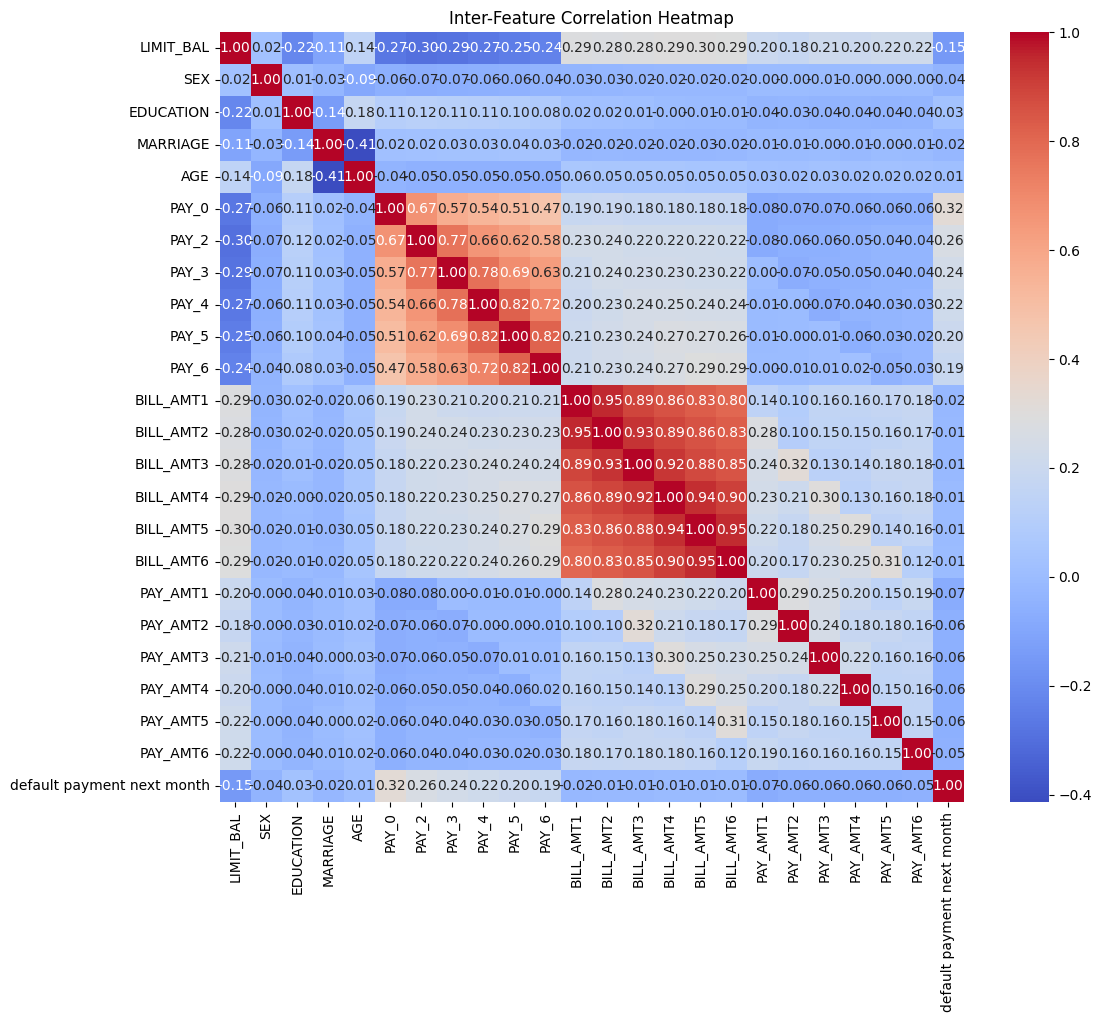

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Inter-Feature Correlation Heatmap')
plt.show()

Based off of the heatmap, we can see that the bill amounts are strongly correlated with each other, especially adjacent payments. I will attempt to use PCA reduction to clean the data to minimize multiple co-linearity.

(30000, 11)


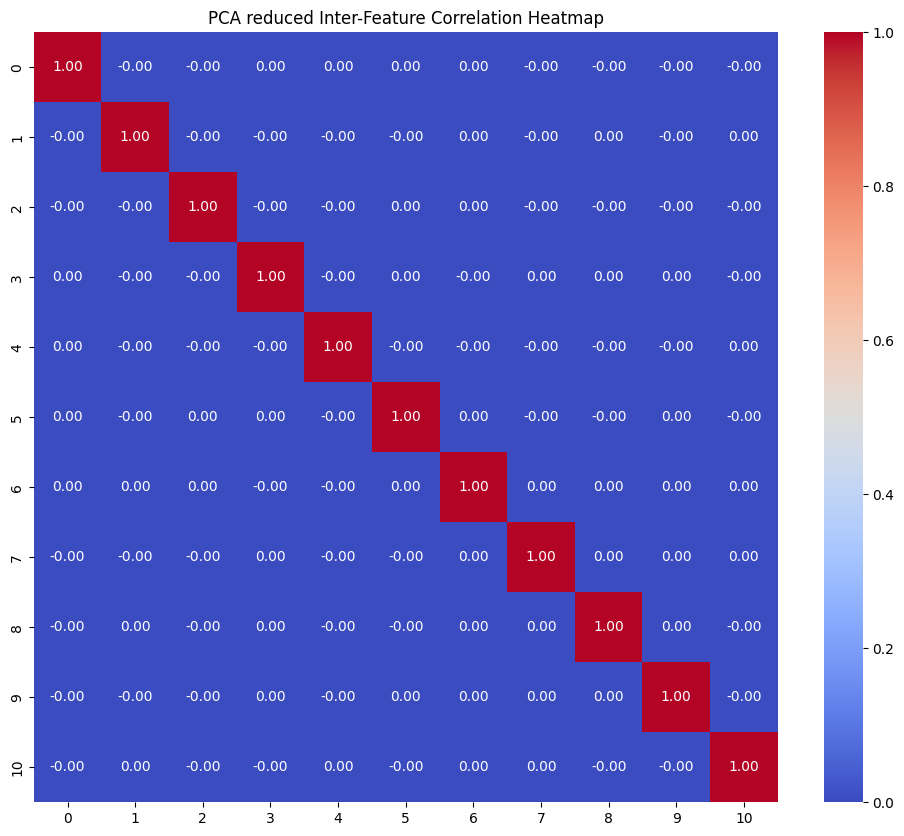

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11)

pca.fit(computable_X.T)

scaled_data = pca.transform(computable_X.T)

print(scaled_data.shape)

scaled_df = pd.DataFrame(scaled_data)

# scaled_df.head()

# print(scaled_df.corr())

correlation_matrix = scaled_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('PCA reduced Inter-Feature Correlation Heatmap')
plt.show()

In [12]:
import torch
from torch.utils.data import random_split, DataLoader, Dataset

class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.data = (torch.from_numpy(X)).float()
        self.labels = (torch.from_numpy(y)).unsqueeze(1).float()
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

reduced_dataset = CustomDataset(scaled_data, computable_y)

train_size = int(0.8 * len(reduced_dataset))
test_size = len(reduced_dataset) - train_size

torch.manual_seed(67)
train_dataset, test_dataset = random_split(reduced_dataset,
                                           [train_size, test_size])

In [19]:
# I am mostly following the tutorial, so I believe I am implementing mini-batch
# gradient descent.

train_dataloader = DataLoader(train_dataset, batch_size=300, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=300, shuffle=False)

epochs = 1000

credit_card_classifier_model = NeuralNetwork(11, 10, 1)
credit_card_classifier_model.to(device)

for t in range(epochs):
  for batch, (X_batch, y_batch) in enumerate(train_dataloader):
    X_batch = X_batch.to(device)
    y_batch = y_batch.to(device)
    last_loss = credit_card_classifier_model.train_step(X_batch, y_batch)

  print(f"Epoch {t + 1}/{epochs} - loss {last_loss}")

Epoch 1/1000 - loss 0.5475342869758606
Epoch 2/1000 - loss 0.5430460572242737
Epoch 3/1000 - loss 0.5030269622802734
Epoch 4/1000 - loss 0.4895575940608978
Epoch 5/1000 - loss 0.4662581980228424
Epoch 6/1000 - loss 0.5128282308578491
Epoch 7/1000 - loss 0.5411754250526428
Epoch 8/1000 - loss 0.5024380683898926
Epoch 9/1000 - loss 0.5333631634712219
Epoch 10/1000 - loss 0.5253254175186157
Epoch 11/1000 - loss 0.5099149942398071
Epoch 12/1000 - loss 0.4782163202762604
Epoch 13/1000 - loss 0.5283926129341125
Epoch 14/1000 - loss 0.5734542608261108
Epoch 15/1000 - loss 0.4766456186771393
Epoch 16/1000 - loss 0.5306315422058105
Epoch 17/1000 - loss 0.5558866262435913
Epoch 18/1000 - loss 0.4798559546470642
Epoch 19/1000 - loss 0.491904616355896
Epoch 20/1000 - loss 0.5281894207000732
Epoch 21/1000 - loss 0.5363501310348511
Epoch 22/1000 - loss 0.5147401690483093
Epoch 23/1000 - loss 0.5530789494514465
Epoch 24/1000 - loss 0.5447927117347717
Epoch 25/1000 - loss 0.5174602270126343
Epoch 26/1

In [17]:
import torch.nn.functional as F

credit_card_classifier_model.eval()

def evaluate_model(model, dataloader):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct, guesses_1 = 0, 0, 0

  with torch.no_grad():
    for X, y in dataloader:
      X = X.to(device)  # Move X to the correct device
      y = y.to(device)  # Move y to the correct device
      pred = model(X)
      test_loss += F.binary_cross_entropy(pred, y)
      correct += ((pred > 0.5) == y).type(torch.float).sum().item()
      guesses_1 += (pred > 0.5).type(torch.float).sum().item()


  test_loss /= num_batches
  correct /= size
  return test_loss, 100*correct, guesses_1

loss, accuracy, guesses_1 = evaluate_model(credit_card_classifier_model, test_dataloader)

print(f"Test Error: \n Accuracy: {accuracy:>0.1f}%, Avg loss: {loss:>8f}, class 1 guesses: {guesses_1} \n")




Test Error: 
 Accuracy: 77.2%, Avg loss: 0.502246, class 1 guesses: 134.0 



In [21]:
class AdadeltaTunableNetwork(NeuralNetwork):
  def __init__(self, n_features, n_hidden, n_output, rho, eps, w_dec):
    super().__init__(n_features, n_hidden, n_output)
    self.optimizer = torch.optim.Adadelta(self.parameters(),eps = eps, rho = rho, lr=1.0)
    self.rho = rho
    self.eps = eps
    self.w_dec = w_dec

  def __str__(self):
        return f"rho = {self.rho}, eps = {self.eps}, weight_decay = {self.w_dec}"

In [28]:
rhos = [0.9, 0.95, 0.99]
epss = [1e-05, 1e-06]

models = list()
epochs = 500

#simple tuning loop

for rho in rhos:
  for eps in epss:
    curr_model = AdadeltaTunableNetwork(11, 10, 1, rho, eps, 0)
    curr_model.to(device)
    for t in range(epochs):
      for batch, (X_batch, y_batch) in enumerate(train_dataloader):
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        last_loss = curr_model.train_step(X_batch, y_batch)

      if t % 50 == 0:
        print(curr_model, f"Epoch {t + 1}/{epochs}")
        loss, accuracy, guesses_1 = evaluate_model(curr_model, test_dataloader)
        print(f"Test Error: \n Accuracy: {accuracy:>0.1f}%, Avg loss: {loss:>8f}, class 1 guesses: {guesses_1} \n")


    models.append((curr_model, accuracy))

rho = 0.9, eps = 1e-05, weight_decay = 0 Epoch 1/500
Test Error: 
 Accuracy: 77.3%, Avg loss: 0.531978, class 1 guesses: 0.0 

rho = 0.9, eps = 1e-05, weight_decay = 0 Epoch 51/500
Test Error: 
 Accuracy: 77.3%, Avg loss: 0.512421, class 1 guesses: 4.0 

rho = 0.9, eps = 1e-05, weight_decay = 0 Epoch 101/500
Test Error: 
 Accuracy: 77.2%, Avg loss: 0.510412, class 1 guesses: 5.0 

rho = 0.9, eps = 1e-05, weight_decay = 0 Epoch 151/500
Test Error: 
 Accuracy: 77.1%, Avg loss: 0.508150, class 1 guesses: 14.0 

rho = 0.9, eps = 1e-05, weight_decay = 0 Epoch 201/500
Test Error: 
 Accuracy: 77.3%, Avg loss: 0.507395, class 1 guesses: 4.0 

rho = 0.9, eps = 1e-05, weight_decay = 0 Epoch 251/500
Test Error: 
 Accuracy: 77.2%, Avg loss: 0.505720, class 1 guesses: 10.0 

rho = 0.9, eps = 1e-05, weight_decay = 0 Epoch 301/500
Test Error: 
 Accuracy: 77.2%, Avg loss: 0.505813, class 1 guesses: 6.0 

rho = 0.9, eps = 1e-05, weight_decay = 0 Epoch 351/500
Test Error: 
 Accuracy: 77.2%, Avg loss: 0.

In [32]:
best_model = models[2]

print(best_model[0])

loss, accuracy, guesses_1 = evaluate_model(best_model[0], test_dataloader)

print(f"Best model loss: {loss}")
print(f"Best model accuracy: {accuracy}")
print(f"Best model class 1 guess count: {guesses_1}")

rho = 0.95, eps = 1e-05, weight_decay = 0
Best model loss: 0.5047251582145691
Best model accuracy: 77.11666666666666
Best model class 1 guess count: 17.0


Results: the best performing model appeared to be the one trained with default Adadelta parameters (rho = 0.9, eps = 1e-06, weight_decay = 0). This may not be attributable to the parameters, but due to training length:

- Accuracy: 77.2%, Avg loss: 0.502246, class 1 guesses: 134.0

Among the tuned models, the best performing one had parameters rho = 0.95, eps = 1e-05, weight_decay = 0:
- rho = 0.95, eps = 1e-05, weight_decay = 0
- Best model loss: 0.5047251582145691
- Best model accuracy: 77.11666666666666
- Best model class 1 guess count: 17.0

Additional notes:
- The issues with the model converging to an almost trivial solution seems to persist when training the Pytorch package model (the test set is 6000 samples, but the models infer less than 1% are are class 1).
- Inputs are normalized using Sklearn standard scaler, as I had issues with floating point value overflow from extreme values in the custom implementation.
- For the optimizer, I selected Adadelta, as it eliminates the need to fine-tune a learning rate.
- As an addendum in the repo, I may add a .txt file with the output of training on the tuned parameters for a few thousand epochs, potentially with regularization.
- $\mathbf{TASK 3}$: I selected hyperparameters using a simple tuning process with 6 possible total parameter combinations. I initally tried to integrate regularization by tuning a regularization parameter (weight decay is the parameter for L2 regularization for Adadelta). However, it seemed to over-penalize, as the model predicted no . In my addendum, I may try training again with a very low weight decay.